In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint as pprint
import json
from pandas.io.json import json_normalize
from scipy.stats import linregress



In [2]:
clean_city_data = pd.read_csv('output_data/cleancitydata.csv')
clean_city_data.head()

,City,Latitude,Longitude,Max Temp (F),Humidity %,Cloudiness %,Wind Speed (mph),Country,Date
0,Port Lincoln,-34.73,135.87,60.278,62,25,10.200446,AU,1595989716
1,Ushuaia,-54.80,-68.30,35.600,80,40,20.803542,AR,1595989716
2,Cayenne,4.93,-52.33,78.800,88,26,12.504495,GF,1595989716
3,Treinta y Tres,-33.23,-54.38,36.212,84,0,5.883152,UY,1595989717
4,Longyearbyen,78.22,15.64,51.800,81,75,11.408394,SJ,1595989645


## Latitude vs. Temperature Plot

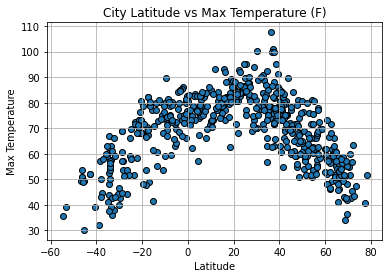

In [3]:
plt.scatter(clean_city_data["Latitude"], clean_city_data["Max Temp (F)"], marker="o", edgecolors="black")
plt.title("City Latitude vs Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid()
# plt.savefig('output_data/fig1.png')

In [4]:
# this scatterplot shows the relationship between latitude and temperature - it confirms
# the accepted idea that the earth is hottest at the equator, so the closer the latitude is to
# 0, the otter it is. It is currently summer for the northern hemisphere so that could account 
# for warmer temperatures and more outliers in the 20-40 latitudes

## Latitude vs. Humidity Plot

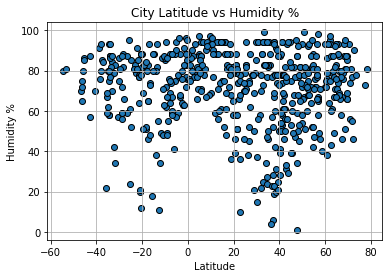

In [5]:
plt.scatter(clean_city_data["Latitude"], clean_city_data["Humidity %"], marker="o", edgecolors="black")
plt.title("City Latitude vs Humidity %")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid()
# plt.savefig('output_data/fig2.png')

In [6]:
# comparing the humidity vs latitude tells me that we live in a humid world. There doesn't
# seem to be a correlation with latitude and humidity.

## Latitude vs. Cloudiness Plot

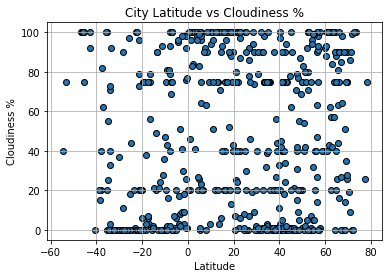

In [7]:
plt.scatter(clean_city_data["Latitude"], clean_city_data["Cloudiness %"], marker="o", edgecolors="black")
plt.title("City Latitude vs Cloudiness %")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid()
# plt.savefig('output_data/fig3.png')

In [8]:
# this chart shows there isn't much correlation between cloudiness and latitude. Clouds are
# everywhere. I would be curious to know how this is measured. Is it measured visually by
# humans or some sort of technogology measures it?

## Latitude vs. Wind Speed Plot

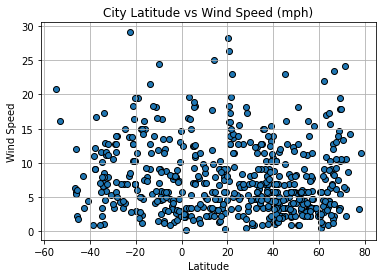

In [9]:
plt.scatter(clean_city_data["Latitude"], clean_city_data["Wind Speed (mph)"], marker="o", edgecolors="black")
plt.title("City Latitude vs Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
# plt.savefig('output_data/fig4.png')

In [10]:
# there doesn't seem to be much of a correlation between latitude and wind speed. It seems 
# like wind speed is generally below 15 mph

## Plotting with functions

In [11]:
# create function to recreate all the latitude vs plots
def plots(x_axis, values, output, xlims):
    data_names = ["Max Temp (F)", "Humidity %", "Cloudiness %", "Wind Speed (mph)"]
    plt.xlim(xlims)
    plt.scatter(x_axis, values, marker="o", edgecolors="black")
    plt.xlabel("Latitude")
    ylab = data_names[index]
    plt.ylabel(ylab)
    plt.title(f"{ylab} vs Latitude")
    plt.grid()
    plt.savefig(output.format(index), format='png')
    plt.show()    
    plt.clf()


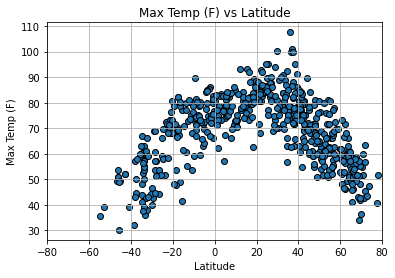

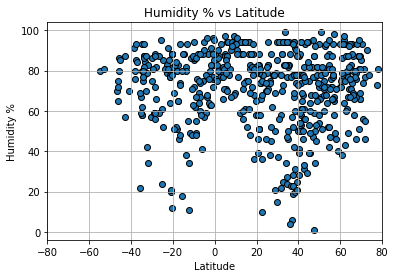

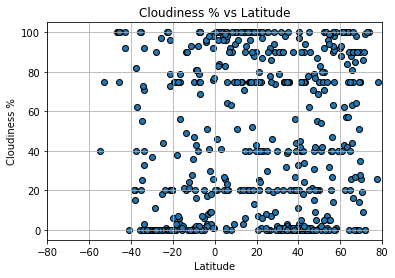

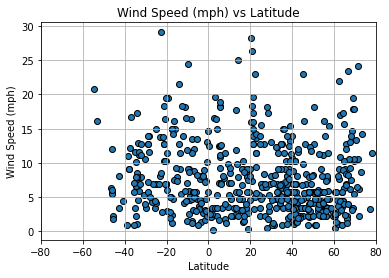

<Figure size 432x288 with 0 Axes>

In [12]:
# call function in a loop to recreate and save plots
output = "assets/images/fig{0:1d}.png"
x_axis = clean_city_data["Latitude"]
xlims = (-80,80)
data_list = [clean_city_data["Max Temp (F)"], clean_city_data["Humidity %"], 
             clean_city_data["Cloudiness %"], clean_city_data["Wind Speed (mph)"]]
for index, value in enumerate(data_list):
    plots(x_axis, value, output, xlims)

## Linear Regression

In [13]:
# create function
clean_city_data.head()

,City,Latitude,Longitude,Max Temp (F),Humidity %,Cloudiness %,Wind Speed (mph),Country,Date
0,Port Lincoln,-34.73,135.87,60.278,62,25,10.200446,AU,1595989716
1,Ushuaia,-54.80,-68.30,35.600,80,40,20.803542,AR,1595989716
2,Cayenne,4.93,-52.33,78.800,88,26,12.504495,GF,1595989716
3,Treinta y Tres,-33.23,-54.38,36.212,84,0,5.883152,UY,1595989717
4,Longyearbyen,78.22,15.64,51.800,81,75,11.408394,SJ,1595989645


In [14]:
# Create Northern and Southern Hemisphere DataFrames
northern_city_data = clean_city_data.loc[clean_city_data["Latitude"] > 0]
southern_city_data = clean_city_data.loc[clean_city_data["Latitude"] < 0]


In [24]:
# create function to plot latidude data by hemisphere
def linplot(value, x_axis, output, title, color, xlims):
    plt.xlim(xlims)
    data_names = ["Max Temp (F)", "Humidity %", "Cloudiness %", "Wind Speed (mph)"]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, value)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_axis, value, c=color, marker="o", edgecolors="black")
    plt.plot(x_axis,regress_values,"r-")
    plt.annotate(line_eq, xy=(50, 10), xycoords='figure points',fontsize=12,color="red")
    plt.xlabel("Latitude")
    ylab = data_names[index]
    plt.ylabel(ylab)
    plt.title(f"{ylab} vs {title}")
    print(f"The r-squared is: {rvalue**2}")
    plt.savefig(output.format(index), format='png')
    plt.show()    
    plt.clf()
    

#### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.47443118483180263


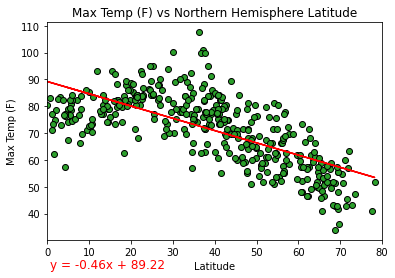

The r-squared is: 0.004891399110124999


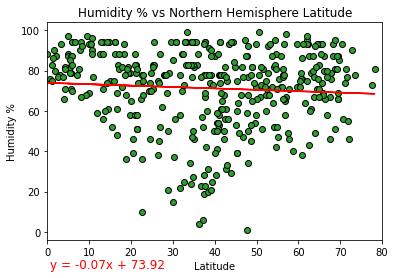

The r-squared is: 0.0039032438238062865


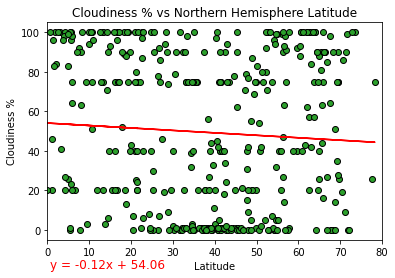

The r-squared is: 0.0036108403387741786


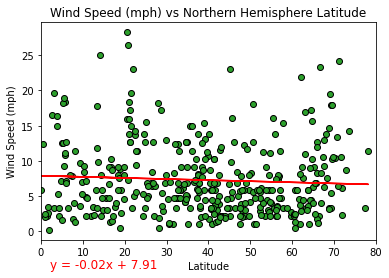

<Figure size 432x288 with 0 Axes>

In [25]:
# Plot all latitude vs for northern hemisphere data
xlims = (0,80)
color = '#2ca02c'
title = 'Northern Hemisphere Latitude'
output = "assets/images/NHplot{0:02d}.png"
x_axis = northern_city_data["Latitude"]
data_list = [northern_city_data["Max Temp (F)"], northern_city_data["Humidity %"], 
             northern_city_data["Cloudiness %"], northern_city_data["Wind Speed (mph)"]]
for index, value in enumerate(data_list):
    linplot(value, x_axis, output, title, color, xlims)

In [26]:
# there seems to be no correlation between wind speed and cloudiness with latitude in the 
# northern hemisphere. The strongeset correlation is between temperature and latitude


#### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5704872934418403


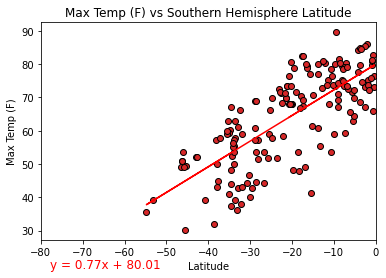

The r-squared is: 0.0013619505190634572


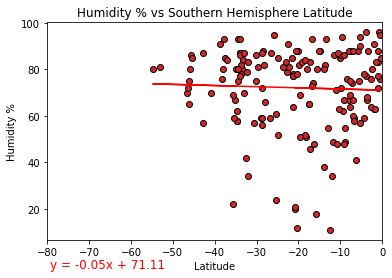

The r-squared is: 0.0021058406606783257


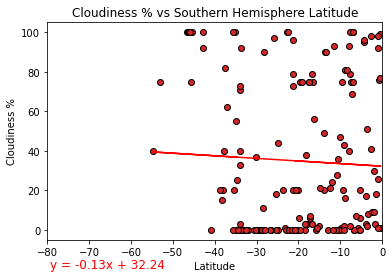

The r-squared is: 0.0069026991099912244


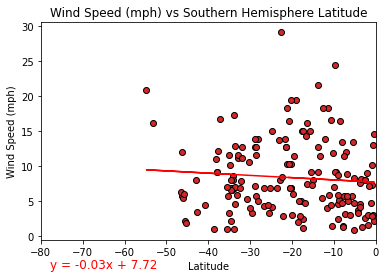

<Figure size 432x288 with 0 Axes>

In [27]:
# plot all latitude vs for southern hemisphere data 
xlims = (-80,0)
color = '#d62728'
title = 'Southern Hemisphere Latitude'
output = "assets/images/SHplot{0:02d}.png"
x_axis = southern_city_data["Latitude"]
data_list = [southern_city_data["Max Temp (F)"], southern_city_data["Humidity %"], 
             southern_city_data["Cloudiness %"], southern_city_data["Wind Speed (mph)"]]
for index, value in enumerate(data_list):
    plt.xlim(-80,0)
    linplot(value, x_axis, output, title, color, xlims)
    

In [28]:
# 3 observable trends from data:
# 1. the temperature does increase towards the equator and decrease the further away it is
# 2. the temperature has a steeper slope away from the equator in the southern hemisphere than
# the northern. The northern hemisphere in general also also significantly more datapoints.
# According to Wikipedia, the northern hemisphere accounts for  67.3% of Earth's total land and around 90% of the 
# world's population. Furthermore, the southern hemisphere is 80.9% water. This could account for both the 
# distribution of the data being predominantly located in the northern hemisphere, as well as warmer temperatures
# the further north you look in the northern hemisphere (in addition to the fact that it is summer in the northern
# hemisphere).
# there actually does seem to be a small but notable trend that places closer to the equator are less humid the 
# the further out you get. However, I would imagine a lot of that is also seasonal and dependent upon larger global 
# weather trends in general.

# additional note: I am curious if there are more data points for weather in the northern hemisphere and we just 
# didn't get that many because of the lack of population & land, and therefore cities & notels nearby. Or if there
# are that many fewerer observation points.

## Absolute values plot

In [29]:
clean_city_data.head()



,City,Latitude,Longitude,Max Temp (F),Humidity %,Cloudiness %,Wind Speed (mph),Country,Date
0,Port Lincoln,34.73,135.87,60.278,62,25,10.200446,AU,1595989716
1,Ushuaia,54.80,-68.30,35.600,80,40,20.803542,AR,1595989716
2,Cayenne,4.93,-52.33,78.800,88,26,12.504495,GF,1595989716
3,Treinta y Tres,33.23,-54.38,36.212,84,0,5.883152,UY,1595989717
4,Longyearbyen,78.22,15.64,51.800,81,75,11.408394,SJ,1595989645


In [30]:
clean_city_data['Latitude'] = clean_city_data['Latitude'].abs()
clean_city_data.head()

,City,Latitude,Longitude,Max Temp (F),Humidity %,Cloudiness %,Wind Speed (mph),Country,Date
0,Port Lincoln,34.73,135.87,60.278,62,25,10.200446,AU,1595989716
1,Ushuaia,54.80,-68.30,35.600,80,40,20.803542,AR,1595989716
2,Cayenne,4.93,-52.33,78.800,88,26,12.504495,GF,1595989716
3,Treinta y Tres,33.23,-54.38,36.212,84,0,5.883152,UY,1595989717
4,Longyearbyen,78.22,15.64,51.800,81,75,11.408394,SJ,1595989645


The r-squared is: 0.25734600786515865


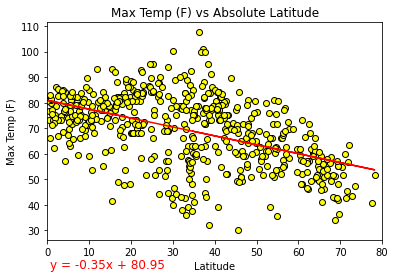

The r-squared is: 0.002699954970546442


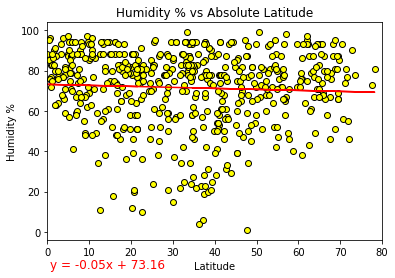

The r-squared is: 0.0012573277433211506


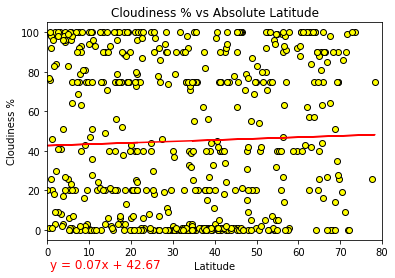

The r-squared is: 0.0042385395153050525


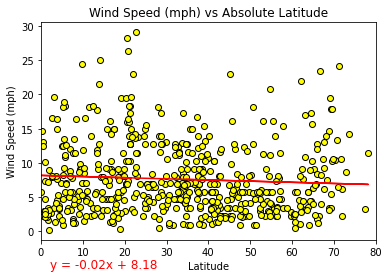

<Figure size 432x288 with 0 Axes>

In [32]:
# Plot absolute latitude data
output = "assets/images/abs_fig{0:1d}.png"
x_axis = clean_city_data["Latitude"]
xlims = (0,80)
color = '#ffff00'
title = 'Absolute Latitude'
data_list = [clean_city_data["Max Temp (F)"], clean_city_data["Humidity %"], 
             clean_city_data["Cloudiness %"], clean_city_data["Wind Speed (mph)"]]
for index, value in enumerate(data_list):
        linplot(value, x_axis, output, title, color, xlims)